In [31]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.layers import Flatten

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

from keras.constraints import maxnorm
from keras.layers import Dropout
from tensorflow.keras.utils import plot_model
import time
import warnings
warnings.filterwarnings("ignore")

In [4]:
path = '/content/drive/MyDrive/final_tidy_reddits_lemmetized.json'
df = pd.read_json(path, orient='table')

In [5]:
df.shape

(301746, 4)

In [6]:
pd.options.display.max_colwidth = None
pd.options.display.max_rows = None

In [7]:
df.sample(7)

,label,text,lemmatized,tokens_back_to_text
266509,depression,"[boyfriend, arguing, pointlessly, got, depressed, decided, withdraw, came, drew, back, awesome, played, hair, awesome, gave, message, nice, asked, wrong, idk, go, feel, like, talking, takes, much, energy, decides, since, want, talk, leave, alone, got, pissed, like, fault, taking, depression, personally, told, numerous, times, honestly, like, people, next, depressed, like, talking, sometimes, nothing, wrong, even, tho, feels, like, everything, wrong, like, well, tried, would, talk, like, try, hard, anyway, whatever, wanted, vent, one, talk, knows, run, end, got, depression, maybe, meant, together, tells, go, away, guess, cant, expect, others, act, way, bc, wish, could, run, away, venting]","[boyfriend, argue, pointlessly, get, depressed, decide, withdraw, come, drew, back, awesome, played, hair, awesome, give, message, nice, ask, wrong, idk, go, feel, like, talk, take, much, energy, decides, since, want, talk, leave, alone, get, piss, like, fault, take, depression, personally, told, numerous, time, honestly, like, people, next, depressed, like, talk, sometimes, nothing, wrong, even, tho, feel, like, everything, wrong, like, well, try, would, talk, like, try, hard, anyway, whatever, want, vent, one, talk, know, run, end, get, depression, maybe, meant, together, tell, go, away, guess, cant, expect, others, act, way, bc, wish, could, run, away, vent]",boyfriend argue pointlessly get depressed decide withdraw come drew back awesome played hair awesome give message nice ask wrong idk go feel like talk take much energy decides since want talk leave alone get piss like fault take depression personally told numerous time honestly like people next depressed like talk sometimes nothing wrong even tho feel like everything wrong like well try would talk like try hard anyway whatever want vent one talk know run end get depression maybe meant together tell go away guess cant expect others act way bc wish could run away vent
82997,Anxiety,"[year, old, cousin, asked, sexual, things, consented, deep, regrets, anxiety, attacks, almost, daily, nearly, years, hate, saying, yes, hate, letting, happen, dont, even, know, id, say, yes, something, like, struggle, family, events, miss, many, seems, issues, remorse, regarding, ive, severe, depression, well, keep, asking, would, agree, let, happen, fault, saying, yes, want, move, past, fear, never]","[year, old, cousin, ask, sexual, thing, consent, deep, regret, anxiety, attack, almost, daily, nearly, year, hate, say, yes, hate, let, happen, dont, even, know, id, say, yes, something, like, struggle, family, event, miss, many, seem, issue, remorse, regard, ive, severe, depression, well, keep, ask, would, agree, let, happen, fault, say, yes, want, move, past, fear, never]",year old cousin ask sexual thing consent deep regret anxiety attack almost daily nearly year hate say yes hate let happen dont even know id say yes something like struggle family event miss many seem issue remorse regard ive severe depression well keep ask would agree let happen fault say yes want move past fear never
242532,depression,"[fucking, hate, life, nobody, ever, talks, outside, school, let, alone, invites, anything, time, ever, told, anyone, depression, told, stop, unappreciative, looking, attention, physically, emotionally, abusive, family, treats, like, horse, shit, hates, feel, like, gaping, void, stomach, never, goes, away, brink, suicide, got, beat, silly, parents, told, call, child, protective, services, take, away, told, world, would, better, ran, traffic, tired, feeling, alone, tired, paranoid, everyone, fake, pretending, like, care, tired, alive, probably, going, hang, days, gon, na, go, cry, sleep, goodbye, world, even, going, hang, soon]","[fuck, hate, life, nobody, ever, talk, outside, school, let, alone, invite, anything, time, ever, told, anyone, depression, told, stop, unappreciative, look, attention, physically, emotionally, abusive, family, treat, lik

In [8]:
df.isna().sum()

label                  0
text                   0
lemmatized             0
tokens_back_to_text    0
dtype: int64

In [9]:
reddits = list(df['tokens_back_to_text'])
type(reddits)

list

In [10]:
len(reddits)

301746

In [11]:
df['label'].value_counts()

depression    178453
Anxiety        84001
bipolar        39292
Name: label, dtype: int64

In [12]:
df['label'] = np.where(df['label']=='bipolar',1,0)

In [13]:
df.head(3)

,label,text,lemmatized,tokens_back_to_text
0,0,"[struggled, social, anxiety, childhood, main, advice, friends, books, professionals, expose, environments, better, example, get, anxious, every, single, time, go, shop, even, though, shopping, weekly, since, get, nervous, sweaty, heart, pounding, every, time, go, gym, yet, working, gym, years, exposure, worked, anyone, else, exposure, work]","[struggle, social, anxiety, childhood, main, advice, friend, book, professional, expose, environment, well, example, get, anxious, every, single, time, go, shop, even, though, shopping, weekly, since, get, nervous, sweaty, heart, pound, every, time, go, gym, yet, work, gym, year, exposure, work, anyone, else, exposure, work]",struggle social anxiety childhood main advice friend book professional expose environment well example get anxious every single time go shop even though shopping weekly since get nervous sweaty heart pound every time go gym yet work gym year exposure work anyone else exposure work
1,0,"[back, march, know, ago, woke, day, go, school, feeling, kind, felt, depressed, really, feel, like, getting, even, seeing, anyone, history, p, really, mainly, happens, winter, time, get, highly, anxious, also, going, anywhere, periods, time, get, suspicious, paranoid, everyone, anything, usually, end, isolating, room, eat, way, less, also, get, highly, irritable, emotional, like, one, time, mom, sent, store, milk, started, crying, store, thought, going, killed, watched, believe, periods, government, something, higher, power, gerbil, studies, something, like, thought, news, real, used, put, fear, people, also, sort, figures, imagination, trying, manipulate, usually, happens, anywhere, day, weekish, also, insomniac, means, anything, p, anyways, yes, ...]","[back, march, know, ago, woke, day, go, school, feel, kind, felt, depressed, really, feel, like, get, even, see, anyone, history, p, really, mainly, happens, winter, time, get, highly, anxious, also, go, anywhere, period, time, get, suspicious, paranoid, everyone, anything, usually, end, isolate, room, eat, way, less, also, get, highly, irritable, emotional, like, one, time, mom, sent, store, milk, start, cry, store, thought, go, kill, watch, believe, period, government, something, high, power, gerbil, study, something, like, thought, news, real, use, put, fear, people, also, sort, figure, imagination, try, manipulate, usually, happens, anywhere, day, weekish, also, insomniac, mean, anything, p, anyways, yes, ...]",back march know ago woke day go school feel kind felt depressed really feel like get even see anyone history p really mainly happens winter time get highly anxious also go anywhere period time get suspicious paranoid everyone anything usually end isolate room eat way less also get highly irritable emotional like one time mom sent store milk start cry store thought go kill watch believe period government something high power gerbil study something like thought news real use put fear people also sort figure imagination try manipulate usually happens anywhere day weekish also insomniac mean anything p anyways yes thats background sit class feel highly anxious everything everyone guess get break point math class second block talk friend remember lot bit blurry happen explain real knew everything figure plan subject everything told thing life matter go die might die right extremely loud talk confuse unaware behaving teacher sat back class like nothing happen kid kind confuse kind explain understand alive point die one remember u really odd recap event suicidal really character end skip rest afternoon day friend request go home sleep bit talk friend happen tell scar go kill confuse despite talk loud much emotion besides try talk parent talk mom feeling nothing real say kid feel like time discus amongst friend ca relate couple month later mom take family doctor ask question kept say everyone felt really awkward find insomniac try go doctor grandma month two ask say felt paranoid somet

In [14]:
df['label'].value_counts()

0    262454
1     39292
Name: label, dtype: int64

## **Feature extraction**

In [15]:
# prepare tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(reddits)

In [16]:
word_index = tokenizer.word_index
print('WE HAVE %s UNIQUE TOKENS.' % len(word_index))

WE HAVE 95809 UNIQUE TOKENS.


In [17]:
sequences = tokenizer.texts_to_sequences(reddits)

In [18]:
# pad redddits to a max length of 150 words
maxlen = 150
X = pad_sequences(sequences, maxlen = maxlen)
X.shape

(301746, 150)

In [19]:
y = df['label']

##Split the dataset into **training** and **test** sets

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((241396, 150), (60350, 150), (241396,), (60350,))

In [22]:
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

# Defining the **Convolutional Neural Network Model**

In [23]:
# Prepare hyperparameters of CNN
vocab_size = len(word_index) + 1
# output_dim = 32

In [24]:
# Building the CNN Model
model = Sequential()

model.add(Embedding(vocab_size, 128, input_length=maxlen))
model.add(Conv1D(128, 3, padding='same', activation='relu'))
model.add(Conv1D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())

model.add(Dense(250, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

### Visualizing the CNN Model

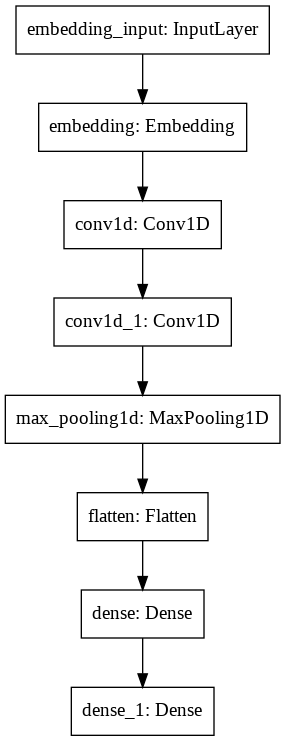

In [25]:
plot_model(model)

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 150, 128)          12263680  
_________________________________________________________________
conv1d (Conv1D)              (None, 150, 128)          49280     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 150, 64)           24640     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 75, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 4800)              0         
_________________________________________________________________
dense (Dense)                (None, 250)               1200250   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2

### Using the **Adam optimizer** for the optimization and **Binary cross entropy** to calculate the Loss Function

In [27]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
start = time.time()

# fit the model to the training set
cnn_hist = model.fit(X_train, y_train, epochs = 5, validation_split = 0.2)

# evaluation of the model on the test set
scores = model.evaluate(X_test, y_test, verbose = 0)
print("Accuracy: %.2f%%" % (scores[1]*100))
warnings.filterwarnings("ignore")

end = time.time()
total = (end-start) // 60
print('Training duration : {} minutes'.format(total))

Epoch 1/5
6035/6035 [==============================] - 1180s 195ms/step - loss: 0.1786 - accuracy: 0.9423 - val_loss: 0.1593 - val_accuracy: 0.9479
Epoch 2/5
6035/6035 [==============================] - 1242s 206ms/step - loss: 0.1417 - accuracy: 0.9530 - val_loss: 0.1629 - val_accuracy: 0.9460
Epoch 3/5
6035/6035 [==============================] - 1256s 208ms/step - loss: 0.1109 - accuracy: 0.9631 - val_loss: 0.1784 - val_accuracy: 0.9439
Epoch 4/5
6035/6035 [==============================] - 1204s 200ms/step - loss: 0.0794 - accuracy: 0.9736 - val_loss: 0.2320 - val_accuracy: 0.9356
Epoch 5/5
6035/6035 [==============================] - 1183s 196ms/step - loss: 0.0546 - accuracy: 0.9817 - val_loss: 0.2976 - val_accuracy: 0.9315
Accuracy: 93.25%
Training duration : 101.0 minutes


In [29]:
history_dict = cnn_hist.history

## **Plotting the loss and the accuracy of both training and validation sets using the model history**

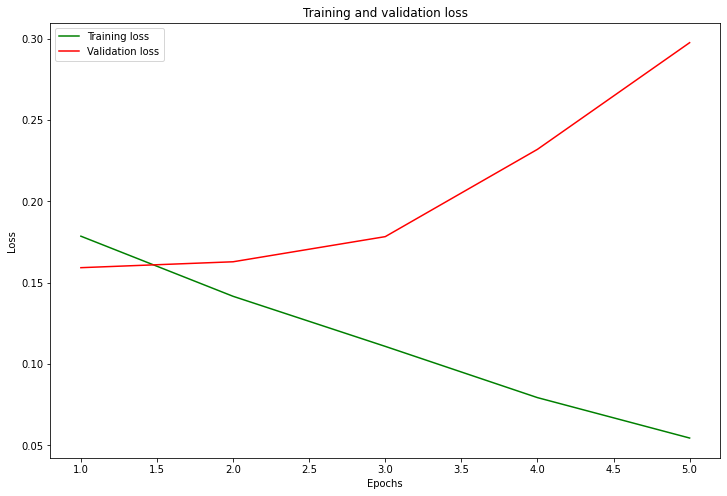

In [34]:
# loss
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1) 

# plot
plt.figure(figsize=(12, 8))
plt.plot(epochs, loss_values, 'green',label='Training loss')
plt.plot(epochs, val_loss_values, 'red', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

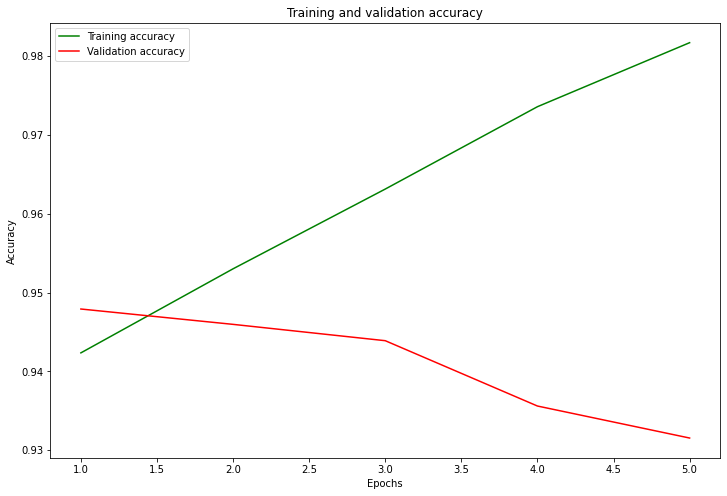

In [35]:
# accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 8))
plt.plot(epochs, acc, 'green',label='Training accuracy')
# orange is for "orange"
plt.plot(epochs, val_acc, 'red', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## **Confusion matrix**

In [36]:
preds = np.round(model.predict(X_test), 0)

In [37]:
cm = confusion_matrix(y_test, preds)

In [38]:
df_cm = pd.DataFrame(cm, index = ["depression", "non-depression"], columns = ["depression", "non-depression"])

Text(30.499999999999993, 0.5, 'Predicted Class')

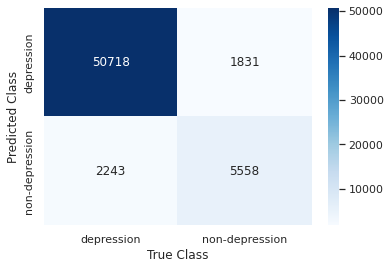

In [45]:
plt.figure(figsize=(6, 4))
sb.set_theme()
sb.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('True Class')
plt.ylabel('Predicted Class')